## Project Name

Name of Project:  Employee Turnover Prediction

If an employee that you have invested so much time and money leaves for other companies, then this would mean that you would have to spend even more time and money to hire somebody else. Making use of data science and predictive modeling techniques, we can predict the employee turnover rate which will save the company from loss. This project is to find out the employees who are going to leave their company and employees who are going to stay in their company.

## Aim

My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.

## Objective

The objective of this project is to conduct a comparison study utilizing machine learning techniques to predict an employee’s future in a company. Using evaluation models are assessed in order to discover the best efficient model for the data in hand.

# Attribute information
1] satisfaction_level : - satisfaction level at job of an employee

2] last_evaluation : - Rating between 0 to 1, received by an employee at his last evaluation

3] number_project : - Number of projects, an employee involved in projects

4] average_montly_hours : - Average number of hours in a month, spent by an employee at office 

5] time spend company : - Number of years spent in the company 

6]  Work_accident : - 0 - no accident during employee stay, 1 - accident during employee stay  

7]  left : - 0 indicates employee stays in the company, 1 indicates - employee left the company   

8] promotion_last_5years : - Number of promotions in his stay 

9] Department : - Department, an employee belongs to 

10] Salary : - Salary in USD

## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading The Data

In [2]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df=pd.read_csv('Hr_comma_sep.csv')

In [3]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [6]:
# Display the statistical overview of the employees
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
# Check to see if there are any missing values in our data set
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Exploratory Data Analysis

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_sal = LabelEncoder()
df['sales'] = le_sal.fit_transform(df['sales'])
le_salar = LabelEncoder()
df['salary'] = le_salar.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [12]:
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


<Axes: >

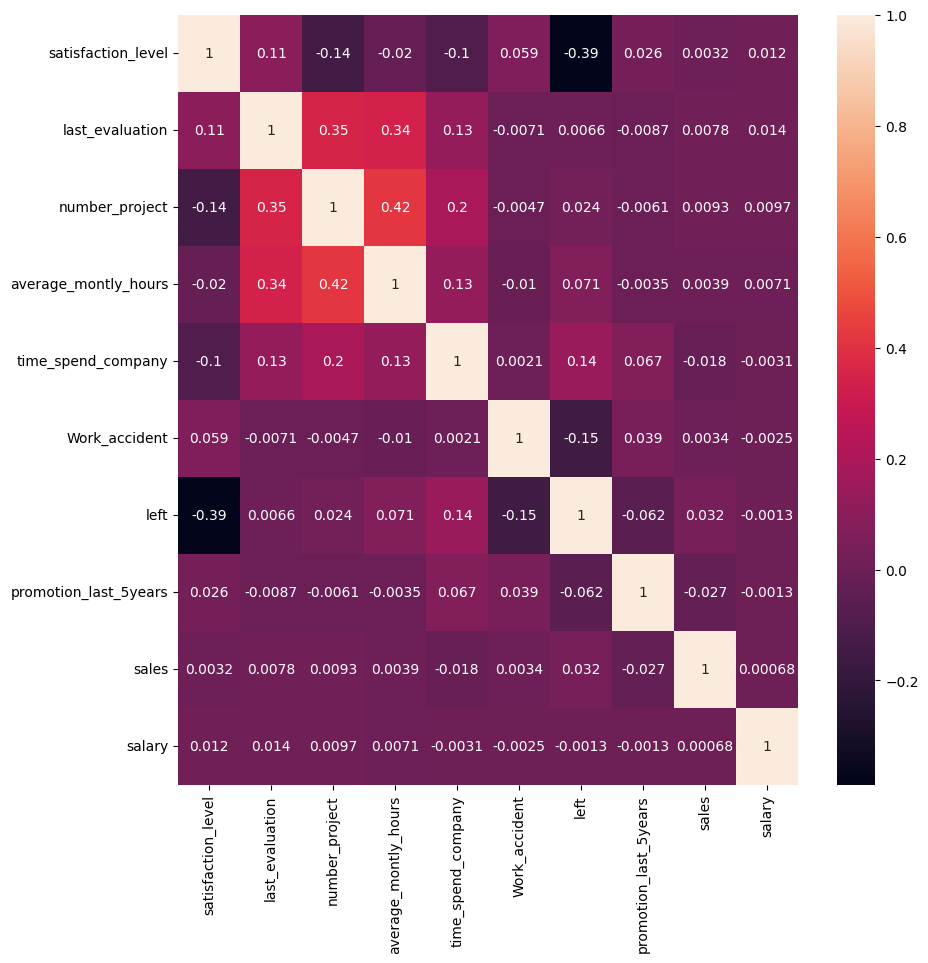

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

In [14]:
# Which features are most correlated 
df.corr()['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
sales                    0.032105
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

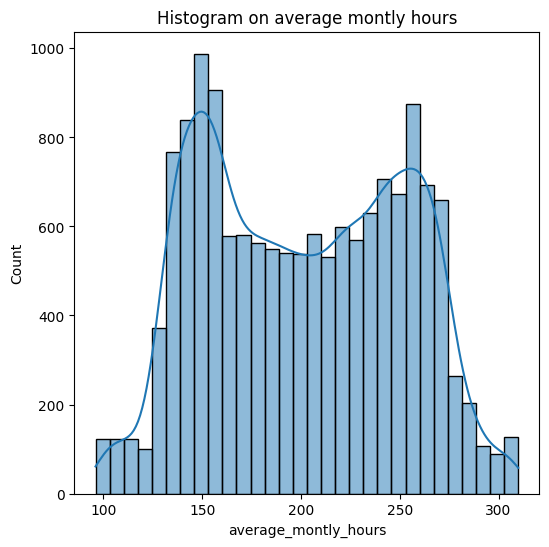

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x=df["average_montly_hours"],kde=True)
plt.title('Histogram on average montly hours')
plt.show()

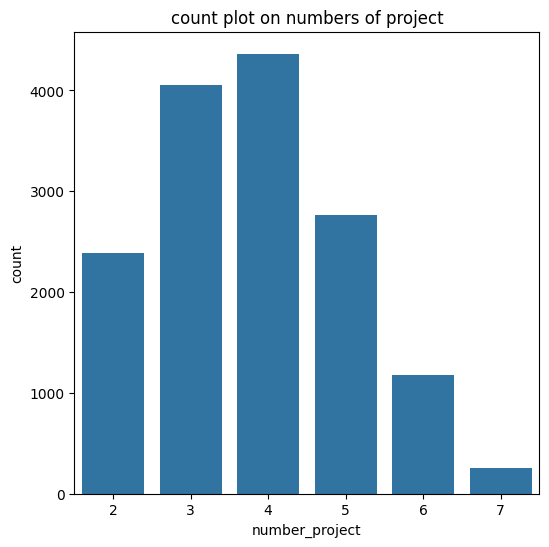

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df["number_project"])
plt.title('count plot on numbers of project')
plt.show()

<Axes: xlabel='sales', ylabel='count'>

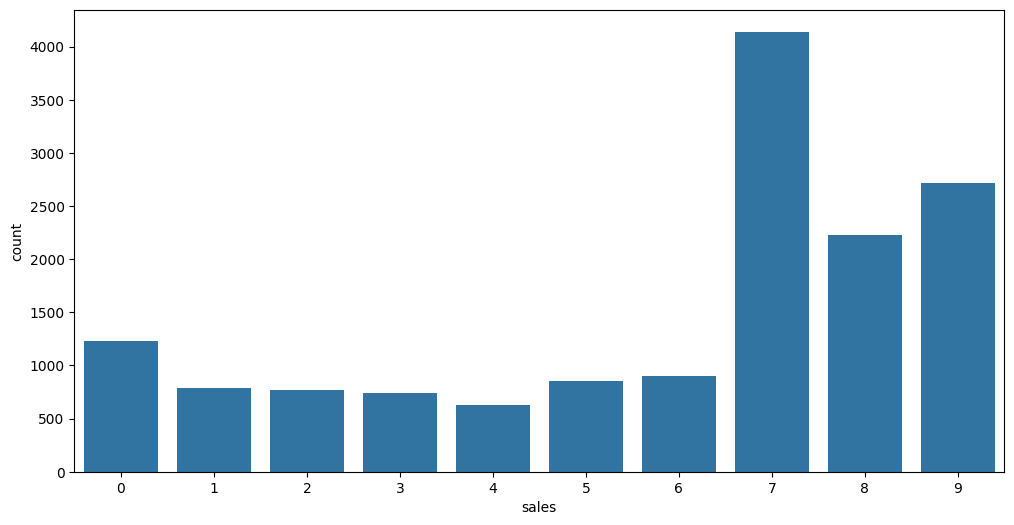

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='sales', data=df)

In [18]:
mapping_sales = {index: label for index,label in enumerate(le_sal.classes_)}
mapping_sales

{0: 'IT',
 1: 'RandD',
 2: 'accounting',
 3: 'hr',
 4: 'management',
 5: 'marketing',
 6: 'product_mng',
 7: 'sales',
 8: 'support',
 9: 'technical'}

<Axes: xlabel='count', ylabel='sales'>

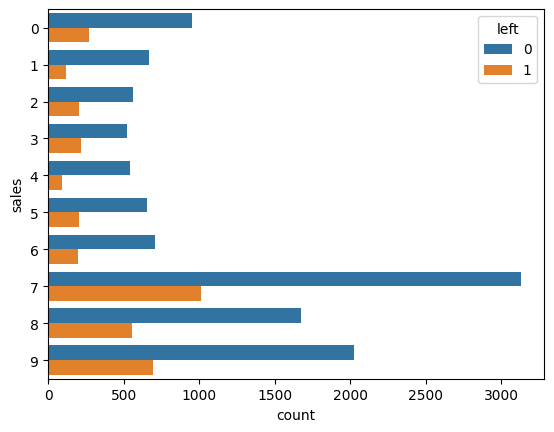

In [19]:
sns.countplot(data=df,y="sales", hue='left')

In [20]:
# left : - 0 indicates employee stays in the company, 1 indicates - employee left the company

## Detecting outliers 

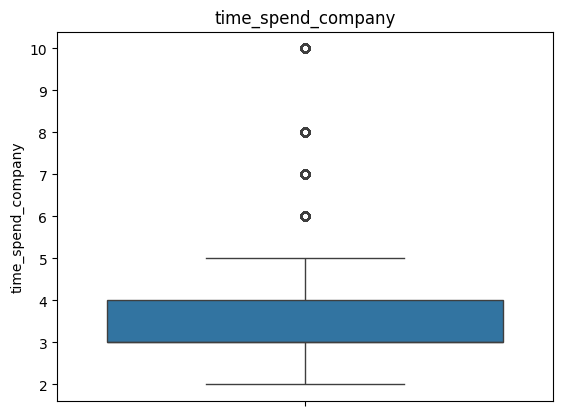

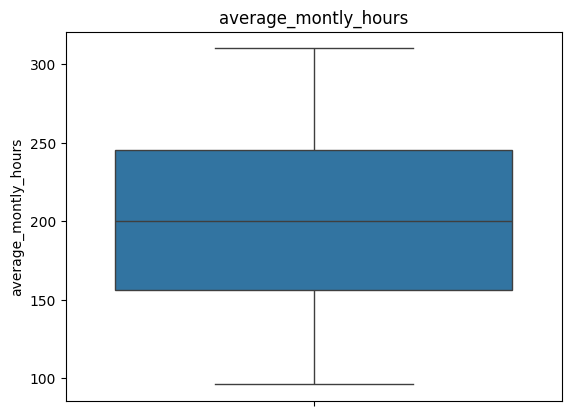

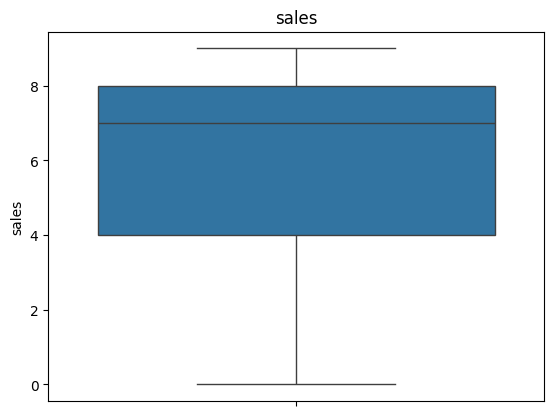

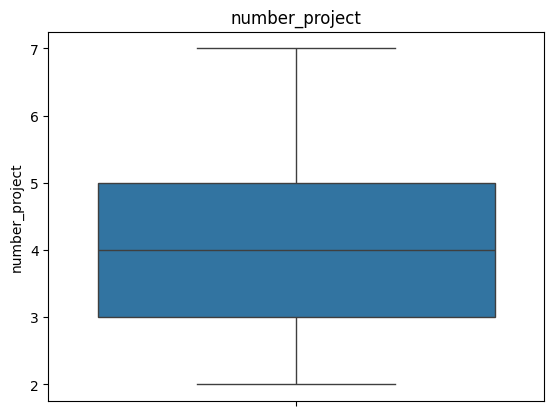

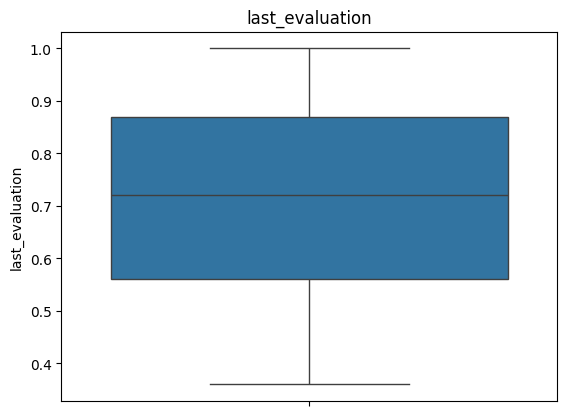

In [21]:
for i in ('time_spend_company','average_montly_hours','sales','number_project','last_evaluation'):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

## Handling Outliers by IQR Method

In [22]:
IQR=df.time_spend_company.quantile(0.75)-df.time_spend_company.quantile(0.25)
lower_bridge=df.time_spend_company.quantile(0.25)-(IQR*1.5)
upper_bridge=df.time_spend_company.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.time_spend_company.quantile(0.75) -df.time_spend_company.quantile(0.25))

1.5 5.5
1.0


In [23]:
df.loc[df['time_spend_company']>=5.5,'time_spend_company']=5.5
df.loc[df['time_spend_company']<=1.5,'time_spend_company']=1.5

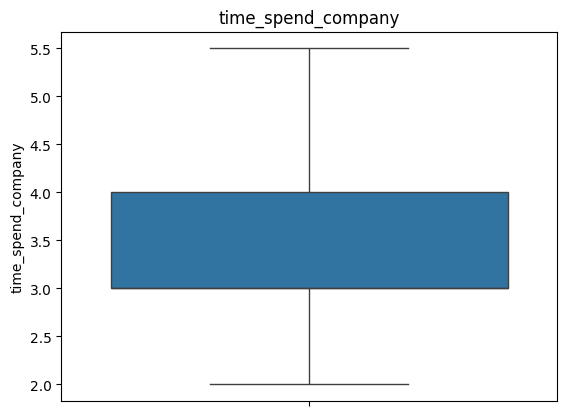

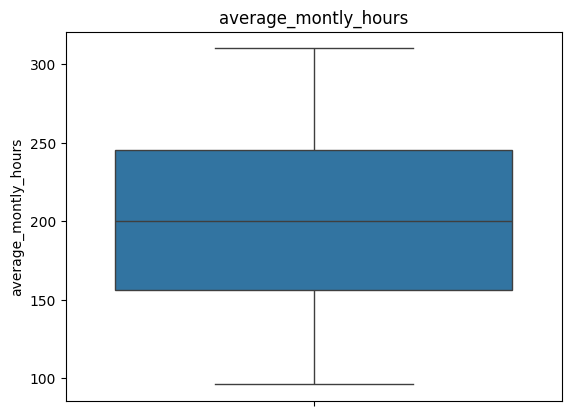

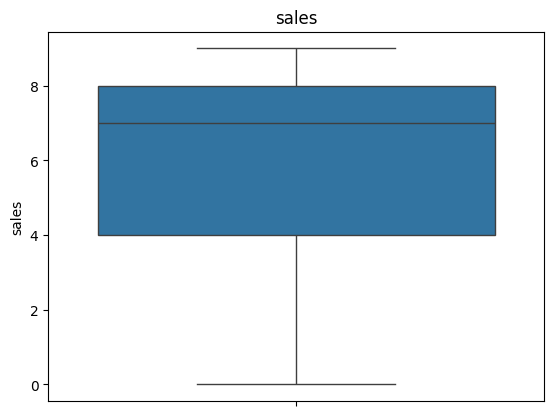

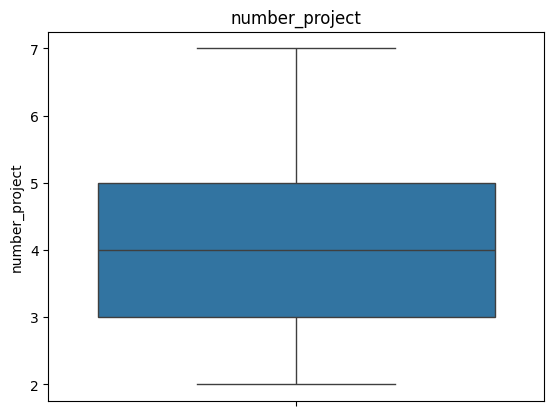

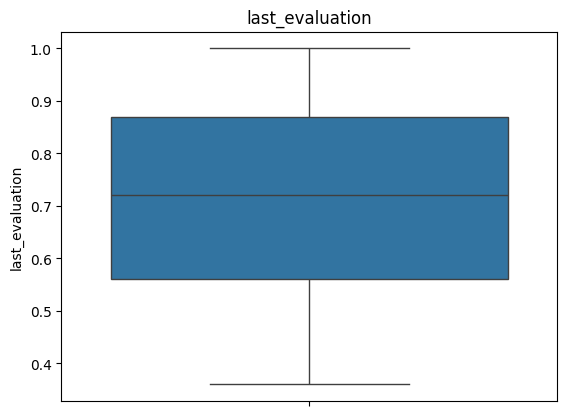

In [24]:
for i in ('time_spend_company','average_montly_hours','sales','number_project','last_evaluation'):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

## Model building process

In [25]:
from sklearn.model_selection import train_test_split

features = df.drop('left',axis = 1)
target = df['left']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42,shuffle=True, stratify=target)


## Handling Imbalanced data

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))


The number of classes before fit Counter({0: 7999, 1: 2500})
The number of classes after fit Counter({0: 7999, 1: 7999})


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_sm,y_train_sm)
y_pred = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy_lr))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.7897777777777778
[[2670  759]
 [ 187  884]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      3429
           1       0.54      0.83      0.65      1071

    accuracy                           0.79      4500
   macro avg       0.74      0.80      0.75      4500
weighted avg       0.84      0.79      0.80      4500



## KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {'n_neighbors':5,
             'p':2,
             'metric':'minkowski',
                }
model_knn = KNeighborsClassifier(**params_knn)
model_knn.fit(X_train_sm,y_train_sm)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy_knn))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.9082222222222223
[[3068  361]
 [  52 1019]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      3429
           1       0.74      0.95      0.83      1071

    accuracy                           0.91      4500
   macro avg       0.86      0.92      0.88      4500
weighted avg       0.93      0.91      0.91      4500



## Support Vector Machine

In [29]:
from sklearn.svm import SVC

params_svc = {'kernel':'rbf'}
model_svc = SVC(**params_svc)
model_svc.fit(X_train_sm,y_train_sm)
y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.686
[[2336 1093]
 [ 320  751]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      3429
           1       0.41      0.70      0.52      1071

    accuracy                           0.69      4500
   macro avg       0.64      0.69      0.64      4500
weighted avg       0.77      0.69      0.71      4500



## XGBoost

In [30]:
import xgboost as xgb

params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(X_train_sm,y_train_sm)
y_pred = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy_xgb))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.9846666666666667
[[3396   33]
 [  36 1035]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.97      0.97      0.97      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(X_train_sm,y_train_sm)
y_pred = model_rf.predict(X_test)
y_pred2 = model_rf.predict(X_train)
accuracy_rf2 = accuracy_score(y_train, y_pred2)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy_rf))
print("Accuracy2 = {}".format(accuracy_rf2))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.9866666666666667
Accuracy2 = 0.9979998095056672
[[3408   21]
 [  39 1032]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Finding out the Important Features

Text(0.5, 1.0, 'Visualizing Important Features From Random_Forest Classifier')

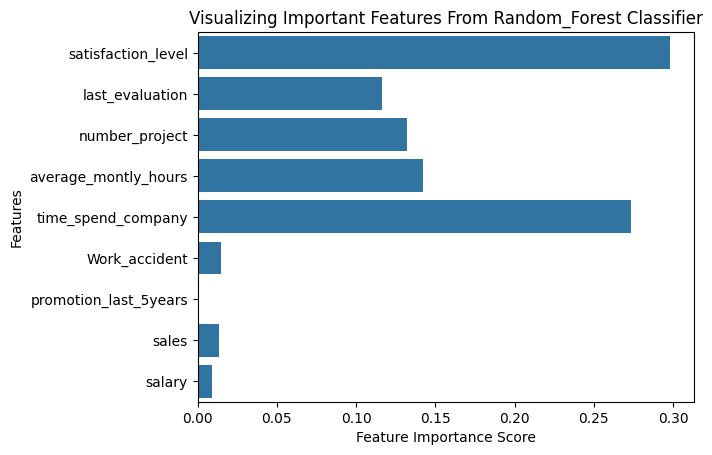

In [32]:
features = df.drop(["left"], axis=1)
feature_imp1 = model_rf.feature_importances_
sns.barplot(x=feature_imp1, y=features.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random_Forest Classifier")


## Building model by using important features only

In [33]:
from sklearn.model_selection import train_test_split

features = df[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"]]
target = df['left']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,shuffle=True, stratify=target)


## SMOTE Analaysis

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))


The number of classes before fit Counter({0: 9142, 1: 2857})
The number of classes after fit Counter({0: 9142, 1: 9142})


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}
model_rf_final = RandomForestClassifier(**params_rf)
model_rf_final.fit(X_train_sm,y_train_sm)
y_pred = model_rf_final.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy_rf))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.9863333333333333
[[2267   19]
 [  22  692]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Plotting graph of accuracy of various models

In [36]:
print(accuracy_lr,accuracy_knn,accuracy, 
        accuracy_xgb,accuracy_rf,accuracy_rf2)

0.7897777777777778 0.9082222222222223 0.686 0.9846666666666667 0.9863333333333333 0.9979998095056672


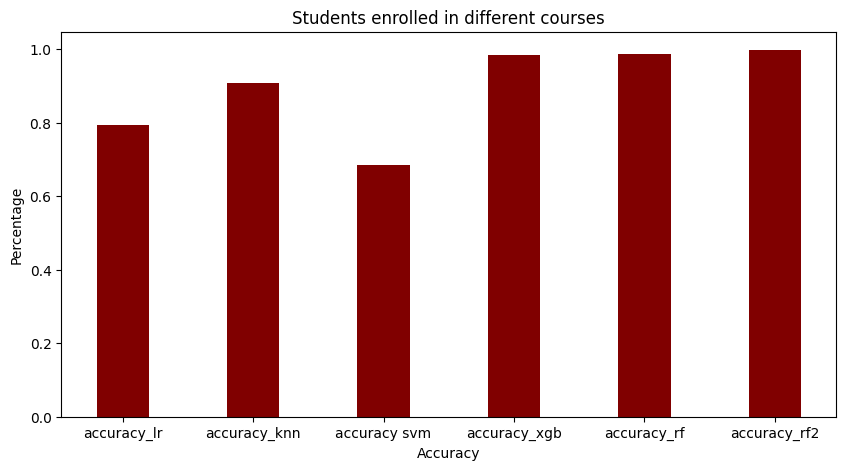

In [37]:
acc = {'accuracy_lr':0.7928888888888889, 'accuracy_knn':0.9082222222222223, 'accuracy svm': 0.686, 
        'accuracy_xgb':0.9846666666666667,'accuracy_rf':0.9863333333333333,'accuracy_rf2':0.9979998095056672}
keys = list(acc.keys())
values = list(acc.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Accuracy")
plt.ylabel("Percentage")
plt.title("Students enrolled in different courses")
plt.show()

In [38]:
import pickle
with open('emp_turnover.pkl', 'wb') as file:
    pickle.dump(model_rf_final, file)

In [39]:
y_test[0:10]

6910     0
2860     0
6286     0
12838    0
13692    0
6133     0
3585     0
330      1
8359     0
4768     0
Name: left, dtype: int64

In [40]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [41]:
X_test.iloc[0:10]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
6910,0.88,1.00,3,125,3.0
2860,0.99,0.68,4,190,3.0
6286,0.40,0.67,3,115,3.0
12838,0.98,0.77,3,191,2.0
13692,0.83,0.73,4,157,2.0
6133,0.59,0.58,2,267,3.0
3585,0.85,0.62,2,280,4.0
330,0.38,0.57,2,140,3.0
8359,0.59,0.57,3,147,4.0
4768,0.93,0.96,3,268,4.0
